# Bird Song Challenge

## Description

Bla bla

## Bla bla

$1+1=2$

In [1]:
# All imports and general functions here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy import signal
import os
from IPython.display import Audio

dir_path = './AmazonBird50_training_input/'
sampling_rate = 44100  # Hz

labels = pd.read_csv(
    './challenge_output_data_training_file_classify_bird_songs.csv', sep=";")


In [2]:

def read_wav_iter(dir_path=dir_path, verbose=0):
    for _, _, files in os.walk(dir_path):
        for i, file_name in enumerate(sorted(files)):
            if verbose:
                print(file_name)
            _, data = wavfile.read(dir_path + file_name)
            yield data

data_iter = read_wav_iter()


In [3]:
first_data = next(data_iter)

In [4]:
from scipy.fftpack import fft

first_fft = fft(first_data)

In [5]:
first_fft.shape

(1918407,)

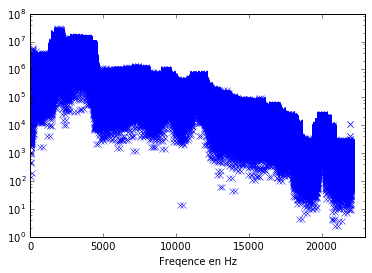

In [6]:
LIM = 1910000
plt.semilogy(np.abs(np.fft.fftfreq(LIM) * 44100.0), np.abs(first_fft[:LIM]), 'x')
plt.xlim(0,23000)
plt.xlabel('Freqence en Hz')

In [7]:
np.fft.fftfreq(first_fft.size)

array([  0.00000000e+00,   5.21265821e-07,   1.04253164e-06, ...,
        -1.56379746e-06,  -1.04253164e-06,  -5.21265821e-07])

In [8]:
np.argmax(np.abs(first_fft))

88142

513 513


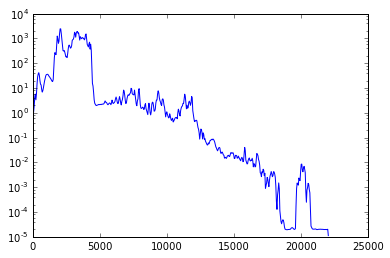

In [9]:
f_first, Pxx = signal.welch(first_data, sampling_rate, nperseg=256*4, scaling='density')
plt.semilogy(f_first, Pxx)
print(len(f_first), len(Pxx))

In [10]:
second_data = next(data_iter)
print(len(second_data))

810962


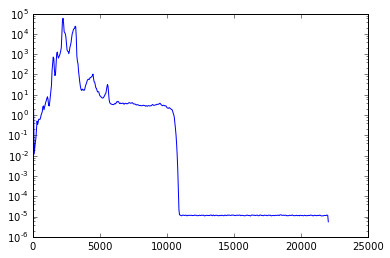

In [11]:
def welch_plot(sig, nperseg=256*4, **kwargs):
    f, Pxx = signal.welch(sig, sampling_rate, nperseg=256*4, **kwargs)
    return f, Pxx
plt.semilogy(*welch_plot(second_data))

8 data


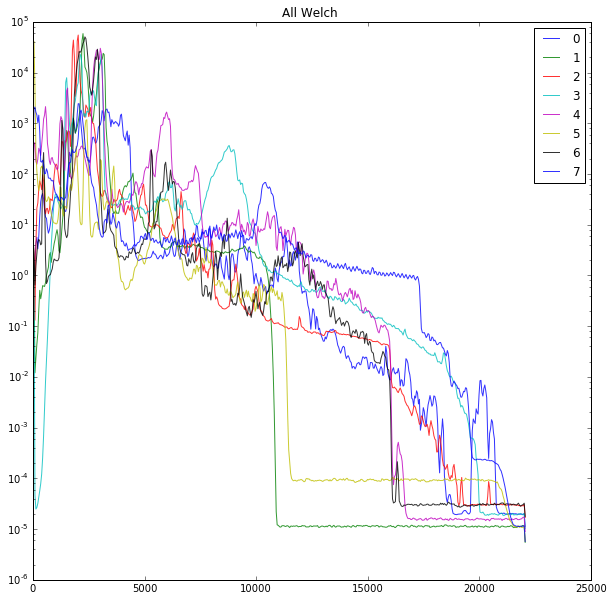

In [53]:
data_iter = read_wav_iter()
all_data_for_a_label = []
curr_i = 1

#for data, i in zip(data_iter, labels.Class):
#    if i > 0:
#        break
#    if i != curr_i:
#        plt.figure(figsize=(10,10))
#        plt.title("Label : "  + str(curr_i))
#        for c, d in zip(list('bgrcmyk'),all_data_for_a_label):
#            plt.semilogy(*welch_plot(d), )
#        plt.show()
#        all_data_for_a_label = []
#    all_data_for_a_label.append(data)

all_colors = list('bgrcmyk')
plt.figure(figsize=(10,10))
plt.title("All Welch ")
for count, (data, i) in enumerate(zip(data_iter, labels.Class)):
    if i > 3:
        print(count, "data")
        break
    if i != curr_i:
        plt.semilogy(*welch_plot(data), all_colors[i], alpha=0.8, label=i)
        curr_i = i
    else:
        plt.semilogy(*welch_plot(data), all_colors[i], alpha=0.8)
plt.legend()
plt.show()

In [18]:
Pxx[np.logical_and(1000 < f_first, f_first <= 2000)]

array([   35.05765152,    35.73442841,    35.06068802,    31.58804893,
          29.47605133,    27.26872826,    25.18683624,    23.06982613,
          20.6425457 ,    18.7932415 ,    18.22934341,    21.90245628,
          57.4864502 ,   168.83718872,   266.91101074,   230.34310913,
         222.76167297,   559.18908691,  1241.75012207,   966.78039551,
         636.67388916,   761.92242432,  1521.24902344], dtype=float32)

In [54]:
def get_features_welch(sig, min_range=1000, max_range=10000, **kwargs):
    # On prend des moyennes, max, std pour voir :
    f, Pxx = welch_plot(sig, **kwargs)
    list_sep = np.arange(min_range, max_range, 500)
    features = [
        Pxx.mean(),
        Pxx.std()]
    for mini, maxi in zip(list_sep[:-2], list_sep[2:]):
        temp_Pxx = Pxx[np.logical_and(mini<f, f<= maxi)]
        features.append(temp_Pxx.mean())
        features.append(temp_Pxx.std())
    return features

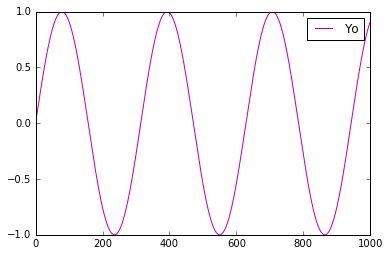

In [35]:
plt.plot(np.sin(np.arange(1000)/50), 'm', label="Yo")
plt.legend()

In [55]:
X_welch = np.array(list(map(get_features_welch, read_wav_iter())))

In [56]:
X_welch.shape

(924, 34)

In [22]:
Audio(np.sin(np.arange(50000)*1500.0 / sampling_rate ), rate=sampling_rate)

In [60]:
y=labels.Class.values

In [63]:
labels.Class.value_counts(sort=True)

26    56
12    43
10    40
36    36
27    34
38    34
40    33
16    31
45    30
31    30
35    27
13    21
9     20
5     20
41    19
11    19
34    18
28    18
24    18
29    17
6     16
7     16
42    16
37    15
15    15
46    15
14    15
25    15
3     15
17    14
22    13
33    13
18    13
23    13
48    12
21    12
30    12
39    11
4     11
47    10
44    10
43    10
19    10
20    10
8      9
2      8
50     8
49     8
1      8
32     7
Name: Class, dtype: int64

In [69]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

print(cross_val_score(RandomForestClassifier(n_estimators=500, max_features=4), X_welch, y, cv=7).mean())

0.301002071592
